# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

# Load images

In [2]:
def load_images():
    path = "./data"

    first_brush_left_list = []

    for i in range(1,149):
        file_location = path + "/" + str(i) + "/" + "FirstBrushOK1L.png"
        current_image = plt.imread(file_location)
        first_brush_left_list.append(current_image)
        
    return first_brush_left_list

## Extract Middle Piece

In [3]:
def extract_centerpiece(image, width):
    offset = math.ceil(width / 2)
    leftPoint = math.ceil(image.shape[1] / 2) - offset
    rightPoint = math.ceil(image.shape[1] / 2) + offset
    return image[0:image.shape[0],leftPoint:rightPoint]

## Get all middle pieces

In [4]:
def load_middle_pieces(width):
    images = load_images()
    middle_pieces = []
    for image in images:
        middle_pieces.append(extract_centerpiece(image, width))

    return middle_pieces

In [18]:
print("Image Data")
print("==========")
first_brush_left_list = load_images()
first_brush_left_list_middle = load_middle_pieces(2170)
image = first_brush_left_list[4]
middlePart = first_brush_left_list_middle[1]
print("max:", np.max(image))
print("min:", np.min(image))
print("size:", image.shape[0], "x", image.shape[1])

Image Data
max: 1.0
min: 0.007843138
size: 234 x 2170


# Show image

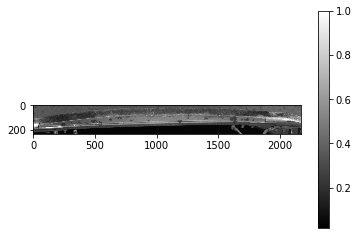

In [19]:
plt.imshow(middlePart, cmap=plt.cm.gray, interpolation='nearest')
plt.colorbar()

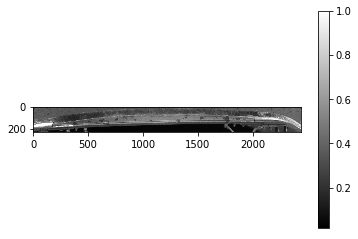

In [139]:
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
plt.colorbar()

In [ ]:
def get_thickness(sobel, thresBin, maxVal, distancePixels):
    image = Image.fromarray(sobel*255)
    threshold, image_binary = cv2.threshold(sobel, thresBin, maxVal, cv2.THRESH_TRUNC)
    (xlim, ylim) = image.size
    medium = math.ceil(xlim / 2)
    left = math.ceil(xlim / 2) - distancePixels
    right = math.ceil(xlim / 2) + distancePixels
    
    yvalues_bottom = []
    yvalues_edge = []
    
    for y in range(ylim):
        px = image_binary[y,medium]
        if px[0] >= th_bin:
            if(y <= 60):
                yvalues_bottom.append(y)
            if(y > 60 and y < 140):
                yvalues_edge.append(y)
    
    #print(statistics.median(yvalues_bottom))
    #print(statistics.median(yvalues_edge))
    
    for y in range(ylim):
        px = image_binary[y,left]
        if px[0] >= th_bin:
            if(y <= 60):
                yvalues_bottom.append(y)
            if(y > 60 and y < 140):
                yvalues_edge.append(y)
                
    #print(statistics.median(yvalues_bottom))
    #print(statistics.median(yvalues_edge))
     
    for y in range(ylim):
        px = image_binary[y,right]
        if px[0] >= th_bin:
            if(y <= 60):
                yvalues_bottom.append(y)
            if(y > 60 and y < 140):
                yvalues_edge.append(y)
    
    average_bottom = sum(yvalues_bottom) / len(yvalues_bottom)
    average_edge = sum(yvalues_edge) / len(yvalues_edge)
    median_bottom = statistics.median(yvalues_bottom)
    median_edge = statistics.median(yvalues_edge)
    
    print("average thickness in pixel: {0}".format(average_edge - average_bottom))
    print("median thickness in pixel: {0}".format(median_edge - median_bottom))
    
    return average_edge - average_bottom